# Задача 1 Связные списки

Напишите функцию (пусть она будет называться reverse_linked_list), которая разворачивает связный список. На вход она принимает головную ноду, а на выход отдаёт хвостовую ноду исходного списка, но только теперь если попробовать пройтись по ней, она будет новой головной. С функцией из примера выше.

In [64]:
class Node(object):
    def __init__(self, value=None, next_node=None):
        self.value = value
        self.next = next_node

    def __str__(self):
        return f"[Node with value {self.value}]"


def print_linked_list(head):
    cur = head
    while cur is not None:
        print(cur)
        cur = cur.next
        

def reverse_linked_list(head):
    prev = None
    current = head
    while current is not None:
        next_node = current.next
        current.next = prev
        prev = current
        current = next_node
    return prev

In [65]:
h, a, b, c, d = Node(1), Node(2), Node(3), Node("Внезапно"), Node(5)

h.next = a
a.next = b
b.next = c
c.next = d

print_linked_list(h)

[Node with value 1]
[Node with value 2]
[Node with value 3]
[Node with value Внезапно]
[Node with value 5]


In [66]:
print_linked_list(h)
h = reverse_linked_list(h)
print("---")
print_linked_list(h)

[Node with value 1]
[Node with value 2]
[Node with value 3]
[Node with value Внезапно]
[Node with value 5]
---
[Node with value 5]
[Node with value Внезапно]
[Node with value 3]
[Node with value 2]
[Node with value 1]


# Задача 2 Пузырьки

Сортировкой пузырьком это один из самых простейших алгоритмов сортировки, который можно придумать. В базовом виде он подразумеват вложенный цикл и реализуется как-то так

In [67]:
l = [2, 4, 1, 1, 2, 0]

for i in range(len(l)):
    for j in range(i, len(l)):
        if l[i] > l[j]:
            l[i], l[j] = l[j], l[i]

print(l)

[0, 1, 1, 2, 2, 4]


Вам предлагается написать функцию, которая будет на вход получать голову несортированного связного списка, а на выход возвращать голову отсортированного.

In [99]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None

def swap(node1, node2):
    temp = node1.data
    node1.data = node2.data
    node2.data = temp

def bubble_sort(head):
    if head is None:
        return None
    
    sorted = False
    while not sorted:
        sorted = True
        current = head
        while current.next is not None:
            if current.data > current.next.data:
                swap(current, current.next)
                sorted = False
            current = current.next
    
    return head

In [100]:
L, a, b, c, d = Node(1), Node(22), Node(3), Node(12), Node(5)

L.next = a
a.next = b
b.next = c
c.next = d

In [108]:
bubble_sort(L) # Не понимаю, почему такой рультат 

# Задача 3 Pandas

## Задание 1

Выясните, сколько в среднем выходит полный счёт по пятницам на ланч у курящих мужчин (датасет tips)

In [3]:
import pandas as pd

In [8]:
df = pd.read_csv('Desktop/tips.csv')

In [9]:
df

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.68,Michael Avila,5296068606052842,Sat2657
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.59,Monica Sanders,3506806155565404,Sat1766
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.34,Keith Wong,6011891618747196,Sat3880
242,17.82,1.75,Male,No,Sat,Dinner,2,8.91,Dennis Dixon,4375220550950,Sat17


In [18]:
le_masque = df["sex"] == "Male"
le_masque = le_masque & (df["day"] == "Fri")
le_masque &= df["smoker"] == "Yes"
le_masque &= df['time'] == "Lunch"

df[le_masque]["total_bill"].mean()

11.386666666666668

## Задание 2

Загрузите iris и посмотрите разбросы по всем числовым значениям для всех трёх классов цветов (датасет iris)

In [19]:
import seaborn as sns

In [21]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [22]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

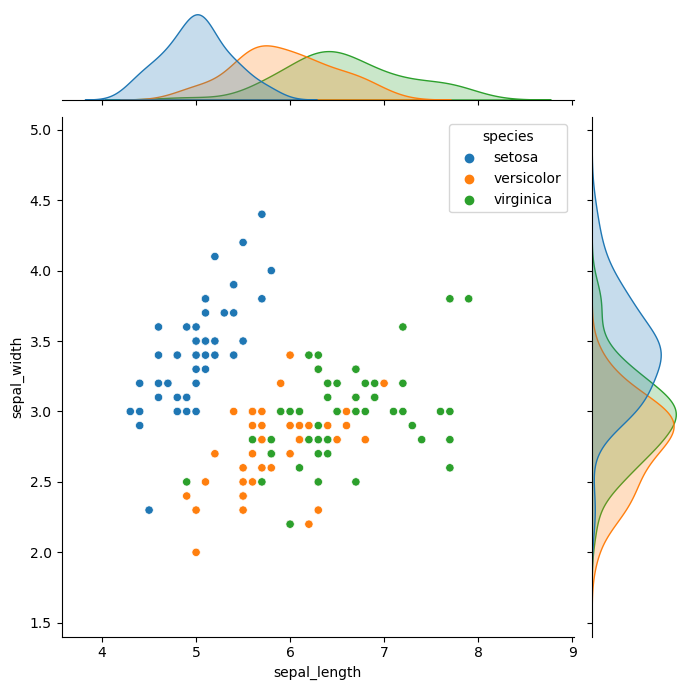

In [34]:
g = sns.jointplot(data=iris,
                  x="sepal_length",
                  y="sepal_width",
                  height=7,
                  color="r", 
                  hue="species")

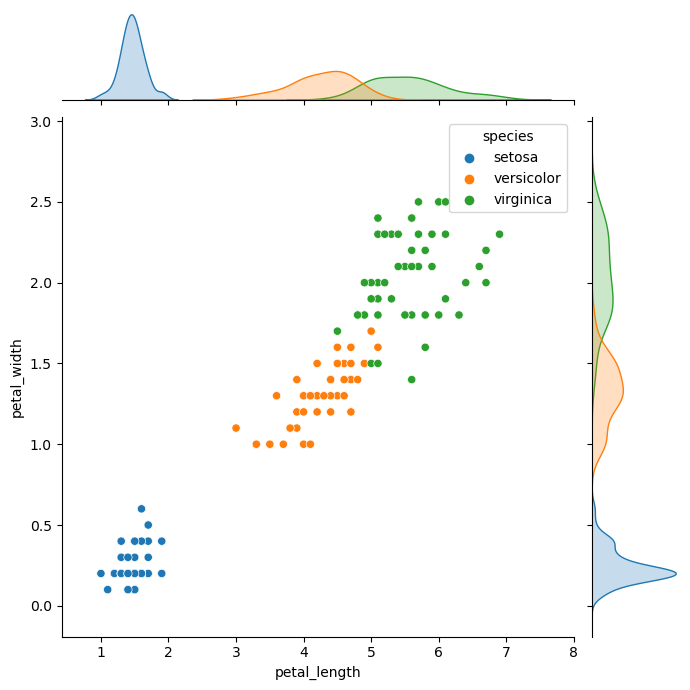

In [35]:
g = sns.jointplot(data=iris,
                  x="petal_length",
                  y="petal_width",
                  height=7,
                  color="r", 
                  hue="species")

## Задание 3

Создайте новый столбец с плотностью населения. Переименуйте названия первого и третьего столбца на русский язык

In [36]:
df = pd.DataFrame({
     'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
     'population': [17.04, 143.5, 9.5, 45.5],
     'square': [2724902, 17125191, 207600, 603628]
 })

In [38]:
df['density'] = df['population']/df['square']

df

,country,population,square,density
0,Kazakhstan,17.04,2724902,0.000006
1,Russia,143.50,17125191,0.000008
2,Belarus,9.50,207600,0.000046
3,Ukraine,45.50,603628,0.000075


In [44]:
df.rename(columns={'col1':'Страна', 'col3':'Площадь'})

df

,Страна,population,Площадь,density
0,Kazakhstan,17.04,2724902,0.000006
1,Russia,143.50,17125191,0.000008
2,Belarus,9.50,207600,0.000046
3,Ukraine,45.50,603628,0.000075
